In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1

In [2]:
df = pd.read_csv('onlinefoods.csv')

In [3]:
df = df.drop(columns=['Unnamed: 12'])

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
df.describe(include = 'object')

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback
count,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive
freq,222,268,207,187,177,301,317


<Axes: title={'center': 'Histogram of Marital Status Variable'}, xlabel='Marital Status', ylabel='count'>

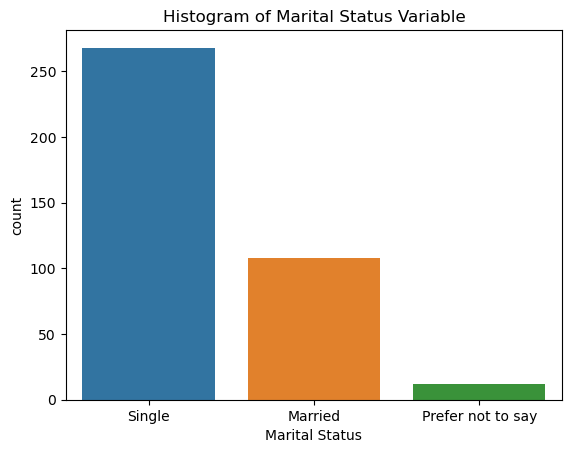

In [8]:
plt.title('Histogram of Marital Status Variable')
sns.countplot(x = 'Marital Status', data = df)

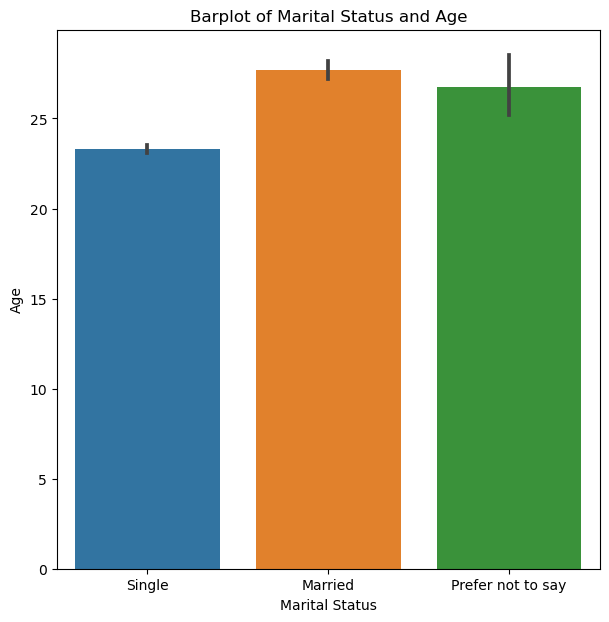

In [9]:
plt.figure(figsize = (7,7))
plt.title("Barplot of Marital Status and Age")
sns.barplot(x = 'Marital Status',
            y = 'Age',
            data = df);

Step 2

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

encoding categorical variables

In [11]:
df_new = df.select_dtypes(include = ['object']).copy()
nRows, nCols = df_new.shape
for myIndex in range(0, nCols):
    headerName = df_new.columns[myIndex]
    df_new[headerName] = df_new[headerName].astype("category")
    df_new[headerName] = df_new[headerName].cat.codes
    df[headerName] = df_new[headerName]
df_numeric = df
df_numeric.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1


 scaling numerical features

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [13]:
numeric = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [14]:
df_scaled = df.copy()

In [15]:
standardscaler = StandardScaler()
df_scaled[numeric] = standardscaler.fit_transform(df[numeric])

In [16]:
print("Standard Scaling:")
print(df_scaled[numeric].head())

Standard Scaling:
        Age  Family size  latitude  longitude  Pin code
0 -1.557620     0.532929  0.102224  -0.016759 -1.247274
1 -0.211614    -0.208205  0.111227  -0.445712 -0.992164
2 -0.884617    -0.208205 -0.381663   1.153112 -0.737055
3 -0.884617     2.015198 -0.557212  -0.751828 -0.673278
4 -0.884617     0.532929  0.291278  -0.913660 -0.960276


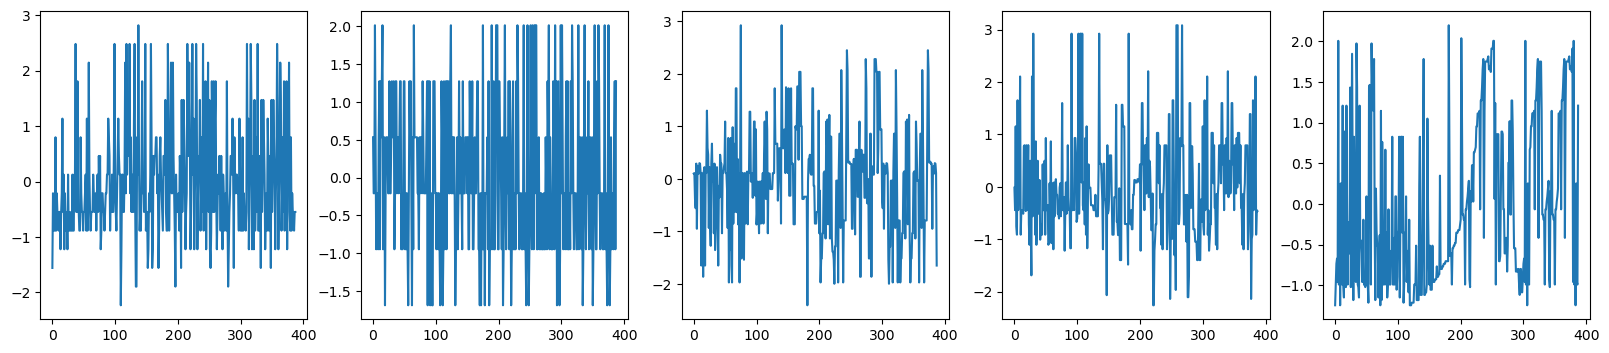

In [17]:
fig, axs = plt.subplots(1, 5, figsize = (20, 4))
for x, y in enumerate(df_scaled[numeric]):
    axs[x].plot(df_scaled[numeric][y])

Step 3

SVM

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [19]:
df_svm = df

In [20]:
categorical = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
               'Educational Qualifications', 'Feedback']

In [21]:
label_encoders = {}
for column in categorical:
    le = LabelEncoder()
    df_svm[column] = le.fit_transform(df_svm[column])
    label_encoders[column] = le

In [22]:
X = df_svm.drop(columns=['Output'])
y = LabelEncoder().fit_transform(df_svm['Output'])

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                     test_size = 0.2, 
                                                     random_state = 42)

In [26]:
svm_model = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
y_pred = svm_model.predict(X_test)

In [28]:
print(f"Accuracy    : {accuracy_score(y_test, y_pred)}")
print(f"Precision   : {precision_score(y_test, y_pred)}")
print(f"recall      : {recall_score(y_test, y_pred)}")
print(f"f1 score    : {f1_score(y_test, y_pred)}")
print(f"classification report:")
print(classification_report(y_test, y_pred))

Accuracy    : 0.8589743589743589
Precision   : 0.9104477611940298
recall      : 0.9242424242424242
f1 score    : 0.9172932330827067
classification report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.91      0.92      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.71      0.72        78
weighted avg       0.85      0.86      0.86        78



KNN

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [30]:
df_knn = df

In [31]:
X = df_knn.drop(columns = ['Output'])
y = df_knn['Output']

In [32]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

In [34]:
knn_model = knn.fit(X_train, y_train)

In [35]:
y_pred_knn = knn.predict(X_test)

In [36]:
print(f"Accuracy    : {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision   : {precision_score(y_test, y_pred_knn)}")
print(f"recall      : {recall_score(y_test, y_pred_knn)}")
print(f"f1 score    : {f1_score(y_test, y_pred_knn)}")
print(f"classification report:")
print(classification_report(y_test, y_pred_knn))

Accuracy    : 0.782051282051282
Precision   : 0.875
recall      : 0.8615384615384616
f1 score    : 0.8682170542635659
classification report:
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.88      0.86      0.87        65

    accuracy                           0.78        78
   macro avg       0.62      0.62      0.62        78
weighted avg       0.79      0.78      0.79        78



Naive Bayes

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [38]:
df_nb = df

In [39]:
X = df_nb.drop(columns = ['Output'])
y = df_nb['Output']

In [40]:
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [42]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(f"Accuracy    : {accuracy_score(y_test, y_pred)}")
print(f"Precision   : {precision_score(y_test, y_pred)}")
print(f"recall      : {recall_score(y_test, y_pred)}")
print(f"f1 score    : {f1_score(y_test, y_pred)}")
print(f"classification report:")
print(classification_report(y_test, y_pred))

Accuracy    : 0.8547008547008547
Precision   : 0.9239130434782609
recall      : 0.8947368421052632
f1 score    : 0.9090909090909092
classification report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        22
           1       0.92      0.89      0.91        95

    accuracy                           0.85       117
   macro avg       0.76      0.79      0.77       117
weighted avg       0.86      0.85      0.86       117



membandingkan ketiga model

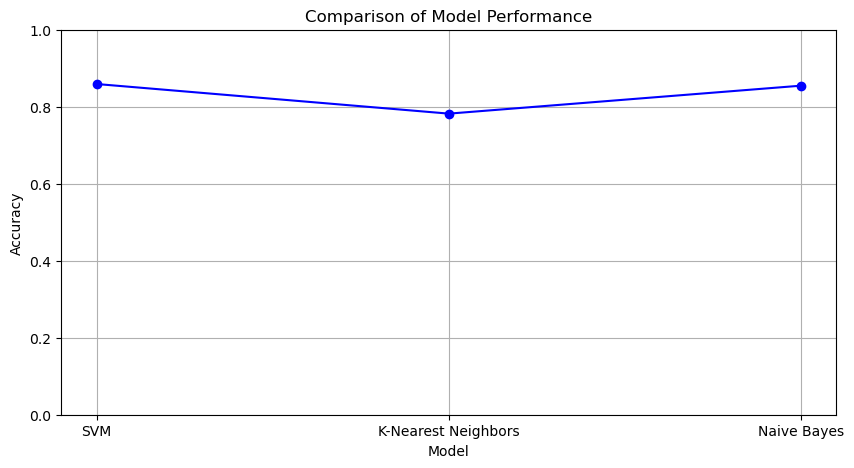

In [46]:
import matplotlib.pyplot as plt

# Nama-nama model
Model = ['SVM', 'K-Nearest Neighbors', 'Naive Bayes']

# Nilai akurasi dari masing-masing model 
Accuracy = [0.8589743589743589, 0.782051282051282, 0.8547008547008547]

plt.figure(figsize = (10, 5))
plt.plot(Model, Accuracy, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance')
plt.ylim([0, 1])
plt.grid(True)
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [83]:
X, y = make_classification(n_samples = 500, n_features = 10, n_classes = 2, random_state = 42)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
scaler = StandardScaler()

In [86]:
svc_model = SVC()

In [87]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svc_model)
])

In [88]:
param_grid = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4],  # hanya digunakan jika kernel adalah 'poly'
}

In [89]:
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100],
                         'svm__degree': [2, 3, 4],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [90]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation accuracy: 0.9075000000000001


In [91]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [92]:
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Test set accuracy: {test_accuracy}")
print("Classification Report:\n", classification_rep)

Test set accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        54
           1       0.85      0.87      0.86        46

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

scores = cross_val_score(svm_model, X, y, cv = 10, scoring='accuracy')
print("Cross Validation:", scores.mean())

Cross Validation: 0.89
